In [1]:
import pandas as pd
import numpy as np
path = '/kaggle/input/housing-prices/housing_prices.csv'
df = pd.read_csv(path)
df

,SquareFootage,Price
0,1100,199000
1,1400,245000
2,1425,230000
3,1550,215000
4,1600,280000
5,1700,295000
6,1750,345000
7,1800,315000
8,1875,325000
9,2000,360000


In [2]:
def gradient_descent(x, y, lr = 1e-3, iters = 10000):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    a = 0
    b = 0
    m = len(x)
    for i in range(iters):
        y_pred = a * x + b
        error = y_pred - y          
        da = 2/m * np.dot(error, x)
        db = 2/m * np.sum(error)
        a -= lr * da
        b -= lr * db
    return a, b

In [3]:
def normalise(x):
    x = np.array(x)
    mean = np.mean(x)
    std = np.std(x)
    x = (x - mean)/std
    return x

In [4]:
x_norm = normalise(df['SquareFootage'])
y_norm = normalise(df['Price'])

In [5]:
a, b = gradient_descent(x_norm, y_norm)

In [6]:
print(f'a (slope) = {a}')
print(f'b (intercept) = {b}')

a (slope) = 0.9871910478285018
b (intercept) = -2.0821439810399027e-16


In [7]:
x = np.array(df['SquareFootage'])
y = np.array(df['Price'])
mean_x, std_x = x.mean(), x.std()
mean_y, std_y = y.mean(), y.std()
a_norm = a
b_norm = b

A = (std_y * a_norm) / std_x
B = std_y * b_norm + mean_y - (std_y * a_norm * mean_x) / std_x

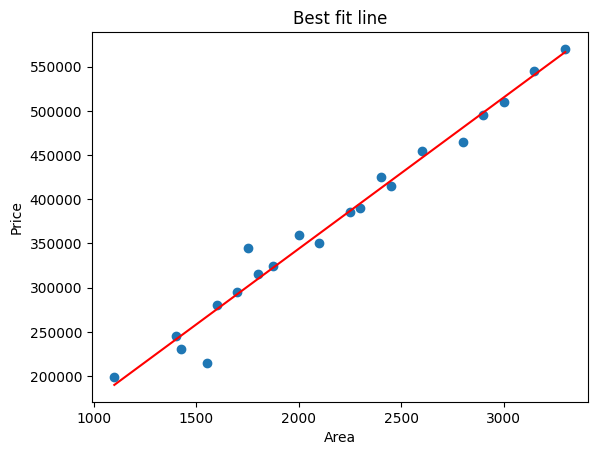

In [8]:
import matplotlib.pyplot as plt
x_line = np.linspace(min(x), max(x), 200)
y_line = A * x_line + B

plt.scatter(x, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Best fit line')
plt.plot(x_line, y_line, color='red')
plt.savefig("A1_240631_Q6.png")
plt.show()

In [9]:
answer = A * 2500 + B
print(f'The price of a house with 2,500 square feet area is {answer:.2f}.')

The price of a house with 2,500 square feet area is 429560.55.
